# Bảng phân công:

**<font color="green">Mỗi người trong nhóm sẽ đặt ra 1 câu hỏi có ý nghĩa, tự xử lý và phân tích dữ liệu và đưa ra câu trả lời:**

| Thành viên | MSSV | Câu hỏi |
| --- | ----------- | ---- |
| Nguyễn Minh Lương | 19120571 | Số lượng track có link mua ở trên SoundCloud qua từng năm.|
| Phạm Văn Nam | 19120597 | sự thay đổi về số lượng creator sử dụng gói pro/pro_unlimited/free qua các năm. |
| Nguyễn Minh Long | 19120568 | Liệu tên dài hay ngắn có ảnh hưởng đến số lượt nghe.|
| Trần Mỹ Hân | 19120217 | Tỉ lệ % track cho phép down (cột downloadable) theo năm (cột created_at) |
| Tạ Võ Anh Khuê | 19120551 | xếp hạng các yếu tố nào có ảnh hưởng nhiều đến số lần nghe(playback_count). |

# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime
import warnings
import json
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE (OPTION) 
# Nếu cần các thư viện khác thì bạn có thể import ở đây

---

# Mục tiêu của đồ án

- Phân tích dữ liệu về các nghệ sĩ, ban nhạc, podcast và người sáng
tác âm nhạc trên trang Soundcloud.

- Và thông qua đồ án này làm quen và biết cách xử lý dữ liệu cơ bản, phân tích và rút ra các insight về tập dữ
liệu.

---

# Thu thập dữ liệu

Bước này đã được hoàn thành tại Project01.

Các dữ liệu gồm có:
* `users.csv` - gồm thông tin của Creator, nhà sáng tạo nội dung,.. trên soundcloud.
* `tracks.csv` - gồm thông tin của track.

---

# Khám phá dữ liệu

## Đọc dữ liệu từ file

Các bạn sẽ viết code để đọc các file .csv vào các biến như sau:
* `tracks.csv` $\to$ `track`.
* `users.csv` $\to$ `user`.

In [2]:
tracks = pd.read_csv("tracks.csv", sep="\t")
users = pd.read_csv("users.csv", sep="\t")

## Hiển thị vài dòng đầu và giải thích ý nghĩa của các cột

### Tập dữ liệu `track.csv`:

In [3]:
tracks.head(5)

,commentable,comment_count,created_at,downloadable,download_count,duration,genre,id,kind,label_name,...,playback_count,public,purchase_url,reposts_count,sharing,state,streamable,tag_list,title,user_id
0,True,219.0,2018-10-28T08:02:52Z,False,0.0,210827,Chill RnB,521020839,track,None,...,6854739.0,True,None,563,public,finished,True,NaN,Nếu mai chia tay ( Hieu Tran Chill RnB Version) - Monstar Ft. Amee,8532516
1,True,966.0,2018-06-05T01:30:10Z,True,894.0,253698,Pop,453875256,track,None,...,9289692.0,True,None,1148,public,finished,True,vietpop viet ronniboi,Khi co don em nho ai,9423936
2,True,310.0,2018-10-26T14:46:56Z,False,0.0,250902,SPACESPEAKERS BALLAD,520248870,track,None,...,7714464.0,True,https://itunes.apple.com/vn/album/em-khong-the-feat-touliver-single/1439925351?fbclid=IwAR1WKyRfJ4QlK5TXlWHwH9Ds8XNcQTsD557OcTo2bvasIHzHUZLXfqC6kQk,2044,public,finished,True,TOULIVER TIENTIEN EMKHONGTHE,EM KHONG THE,3900683
3,True,113.0,2021-06-30T11:36:30Z,False,0.0,174211,R&B,1078746418,track,None,...,1396679.0,True,None,184,public,finished,True,"""Hip Hop"" Rap ONHACHANQUO Taylor TaylorDaClownn. Cozy9ang Pop",Ở NHÀ CHÁN QUÓ (Prod. KanaBeats),125512733
4,True,176.0,2020-03-22T08:41:01Z,False,0.0,254694,NaN,780777223,track,None,...,576781.0,True,None,158,public,finished,True,"Pop Ballad ""tua "" tùa cm1x",Nếu Anh Thấy Lòng Mình Yếu Đuối - Tùa x CM1X,21985491


* ý nghĩa các cột trong tập dữ liệu:

=> đọc file `track_explain.csv`

In [4]:
track_ex = pd.read_csv("track_explain.csv", index_col=0)
track_ex

,mean
id,Id của track đó
genre,thể loại
user_id,user id của tác giả của track này
created_at,thời gian tạo (đăng track)
duration,"là khoảng thời gian hoặc khoảng thời gian dài hay ngắn của một nốt nhạc, cụm từ, phần hoặc sáng tác"
comment_count,số lượng comment
likes_count,số lượng like
playback_count,số lượng lượt nghe
reposts_count,số lượng repost
commentable,track có cho phép comment hay không?


### Tập dữ liệu `user.csv`:

In [5]:
users.head(5)

,comments_count,country_code,created_at,creator_subscriptions,followers_count,followings_count,full_name,id,kind,likes_count,playlist_likes_count,verified,playlist_count,reposts_count,track_count,username,badges
0,44,VN,2011-10-31T10:24:30Z,[{'product': {'id': 'creator-pro-unlimited'}}],2700,2,Hieu Tran,8532516,user,99,3,False,6,None,79,Hieu Tran Music Producer,"{'pro': False, 'pro_unlimited': True, 'verified': False}"
1,37,AU,2011-12-02T06:59:50Z,[{'product': {'id': 'creator-pro'}}],7544,110,NaN,9423936,user,631,4,False,3,None,59,Ronniboi,"{'pro': True, 'pro_unlimited': False, 'verified': False}"
2,9,None,2011-03-29T06:34:41Z,[{'product': {'id': 'creator-pro-unlimited'}}],171517,68,NaN,3900683,user,3,0,True,5,None,181,Touliver,"{'pro': False, 'pro_unlimited': True, 'verified': True}"
3,267,None,2014-11-30T14:55:30Z,[{'product': {'id': 'free'}}],2138,44,Taylor.,125512733,user,648,7,True,0,None,33,TaylorDaClownn.,"{'pro': False, 'pro_unlimited': False, 'verified': True}"
4,2,VN,2012-08-12T01:43:05Z,[{'product': {'id': 'free'}}],5732,8,Quynh Nhu Tran,21985491,user,166,1,True,1,None,9,TÙA,"{'pro': False, 'pro_unlimited': False, 'verified': True}"


* ý nghĩa các cột trong tập dữ liệu:

=> đọc file `user_explain.csv`

In [6]:
user_ex = pd.read_csv("user_explain.csv", index_col=0)
user_ex

,mean
id,id của user
full_name,full name của User
city,thành phố của user
created_at,thời gian tạo tài khoản
likes_count,số lượng track mà user đó like
playlist_count,số lượng playlist
comments_count,số lượng comment của User
track_count,số lượng track của User
followers_count,số lượng follow của User
followings_count,số lượng các tài khoản mà User này follow


## Mỗi tập dữ liệu có bao nhiêu dòng và cột?

In [7]:
n_row_tracks, n_col_tracks = tracks.shape
print("Track dataset have {} rows and {} columns".format(n_row_tracks, n_col_tracks))

Track dataset have 1360 rows and 21 columns


In [8]:
n_row_users, n_col_users = users.shape
print("User dataset have {} rows and {} columns".format(n_row_users, n_col_users))

User dataset have 1101 rows and 17 columns


## Dữ liệu có các dòng bị lặp không?

### Tập dữ liệu track:

In [9]:
num_duplicated_tracks = tracks.index.value_counts().sum() - tracks.shape[0]
print("Number of Duplicated rows in Track dataset: {}".format(num_duplicated_tracks))

Number of Duplicated rows in Track dataset: 0


### Tập dữ liệu user:

In [10]:
num_duplicated_users = users.index.value_counts().sum() - users.shape[0]
print("Number of Duplicated rows in User dataset: {}".format(num_duplicated_tracks))

Number of Duplicated rows in User dataset: 0


## Có dữ liệu bị thiếu hay không?

### Lấy ra các cột có giá trị bị thiếu:

<font color="green">**Tập dữ liệu tracks.csv**

In [11]:
# tracks.csv
tracks_missing_cols = [col for col in tracks.columns if tracks[col].isna().any()]

print("All columns that include missing value in tracks.csv: \n", tracks_missing_cols)

All columns that include missing value in tracks.csv: 
 ['genre', 'label_name', 'tag_list']


<font color="green">**Tập dữ liệu users.csv**

In [12]:
# users.csv
users_missing_cols = [col for col in users.columns if users[col].isna().any()]

print("All columns that include missing value in users.csv: \n", users_missing_cols)

All columns that include missing value in users.csv: 
 ['country_code', 'full_name']


### Phần trăm (%) giá trị bị thiếu của mỗi cột:

<font color="green">**Tập dữ liệu tracks.csv**

In [13]:
(tracks[tracks_missing_cols].isna().sum() / n_row_tracks)*100

genre         18.382353
label_name    16.911765
tag_list      32.794118
dtype: float64

Tập dữ liệu `tracks.csv` có tổng cộng 1360 dòng và 21 cột.
- cột `tag_list` có 33% giá trị bị thiếu => xóa cột `tag_list`.
- cột `label_name` có 17% giá trị bị thiếu => điền thêm vào.
- cột `genre` có 18% giá trị bị thiếu => điền thêm vào.

xóa cột `tag_list` và điền giá trị `'None'` vào cột `label_name` và `genre`

In [14]:
tracks.drop('tag_list', inplace=True, axis=1)

In [15]:
tracks["label_name"].fillna("None", axis=0, inplace=True)
tracks["genre"].fillna("None", axis=0, inplace=True)

<font color="green">**Tập dữ liệu users.csv**

In [16]:
(users[users_missing_cols].isna().sum() / n_row_users)*100

country_code     0.272480
full_name       33.969119
dtype: float64

Tập dữ liệu `users.csv` có tổng cộng 1360 dòng và 21 cột.
- cột `full_name` có 34% giá trị bị thiếu => xóa cột `full_name`.
- cột `country_code` có 0.27% giá trị bị thiếu => điền thêm vào.

xóa cột `full_name` và điền giá trị `'None'` vào cột `country_code`

In [17]:
users.drop('full_name', inplace=True, axis=1)

In [18]:
users['country_code'].fillna("None", axis=0, inplace=True)

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

* cột dữ liệu ngày tháng đang là kiểu dữ liệu gì?

In [19]:
tracks["created_at"].dtype

dtype('O')

In [20]:
users["created_at"].dtype

dtype('O')

=> như đã thấy thì 2 cột dữ liệu ngày tháng năm có kiểu dữ liệu `"object"`
* vậy chúng ta phải chuyển về kiểu `datetime`.

# Chuyển sang bước tiền xử lý

In [21]:
def conv2date(row):
    return datetime.fromisoformat(row[:-1])

In [22]:
tracks["created_at"] = tracks["created_at"].apply(conv2date)
users["created_at"] = users["created_at"].apply(conv2date)

* kiểu dữ liệu hiện tại của cột `created_at`

In [23]:
tracks['created_at'].dtypes

dtype('<M8[ns]')

In [24]:
users["created_at"].dtype

dtype('<M8[ns]')

# Quay lại bước khám phá

* Kiểu dữ liệu của cột `likes_count` trong `tracks.csv`

In [25]:
tracks["likes_count"].dtype

dtype('O')

=> vậy phải chuyển sang kiểu `int`.

# Chuyển sang bước tiền xử lý

In [26]:
def conv2int(row):
    if row == "None":
        return 0
    else:
        return int(float(row))

In [27]:
tracks["likes_count"] = tracks["likes_count"].apply(conv2int)

* Xem lại dữ liệu của cột `likes_count`

In [28]:
tracks["likes_count"].dtype

dtype('int64')

=> kiểu dữ liệu đã phù hợp.

---

# Câu hỏi 1:

## Đưa ra câu hỏi có ý nghĩa cần trả lời

**Soundcloud** cho phép người dùng đăng tải các *bài hát, podcast các nội dung sáng tạo dưới dạng âm thanh* để chia sẻ với mọi người và mọi ở khắp mọi nơi có thể nghe miễn phí ở trên **SoundCloud** tất cả các sản phẩm sáng tạo do các người dùng khác đăng tải.\
Bên cạnh đó **SoundCloud** còn cho phép người dùng thêm các đường dẫn đến trang thượng mại khác để người dùng có thể mua các sản phẩm sáng tạo của họ.\
=> từ dữ liệu về số lượng người dùng đăng tải đường dẫn bán các nội dung sáng tạo của bản thận qua từng năm, thì chúng ta có nhận xét gì về **nhu cầu thương mại hay xu hướng thương mại hóa(tăng/giảm)** hiện nay?\
<font color="red">**=> Và liệu SoundCloud có nên trở thành bên thứ 3 để giúp người dùng có nhu cầu bán các sản phẩm của mình (giống như Itunes của Apple Inc)**</font>

### Câu hỏi cần trả lời: Số lượng người dùng đăng tải các đường dẫn mua 'track' như thế nào qua từng năm (trong 7 năm gần đây nhất)

> Khi có được dữ liệu chúng ta có thể trực quan hóa ,phân tích và đưa ra nhận xét về nhu cầu thương mại của người dùng.

---

## Mong đợi về tập dữ liệu

Mong muốn Số lượng track được đăng tải lên SoundCloud có chứa purchase_url có sự tăng lên rõ rệt qua từng năm. Do các nghệ sĩ Indie (các nghệ sĩ độc lập) ngày càng nhiều, họ chưa nổi tiếng chưa có số lượng fan đông đảo, thay vì kiếm tiền qua việc tổ chức các buổi biểu diễn trực tiếp thì các nghệ sĩ Indie kiếm tiền bằng việc bán các sản phẩm âm nhạc của mình hoặc kiếm tiền qua chương trình đối tác của Youtube, thì các nền tảng nghe nhạc trực tuyến như SoundCloud sẽ là công cụ để họ kiếm tiền.

---

## Danh sách kiểm tra phân tích dữ liệu

* **Xác định dữ liệu dùng để phân tích:**
    * cột `created_at` của tập dữ liệu `tracks`.
    * cột `purchase_url` của tập dữ liệu `tracks`.
* **Tiền xử lý dữ liệu:**
    * cột `created_at` (đã xử lý ở trên).
    * cột `purchase_url` (chưa được xử lý).
* **Trực quan hóa dữ liệu:**
    * trực quan hóa dữ liệu đơn biến (chưa).
    * trực quan hóa dữ liệu đa biến (chưa)
* **Có thể trả lời câu hỏi trên dữ liệu hiện có**
    * hiện tại không thể trả lời câu hỏi. $\to$ cần phải trích xuất dữ liệu.
* **Giải thích dữ liệu và đưa ra câu trả lời**

## Phân tích dữ liệu để trả lời cho câu hỏi

### Tiền xử lý:

Hàm lấy ra năm:

In [37]:
def getYear(row):
    return row.year

Hàm đưa các dòng mang chuỗi `"None"` về `na`

In [38]:
def convNa(row):
    if len(row) < 8:
        return np.nan
    else:
        return row

Thêm 1 cột `year` vào `tracks` là năm của thời điểm người dùng đăng tải nội dung.\
Và lấy ra 2 cột gồm `year` và `purchase_url` và đưa vào biến `down_year`.

In [39]:
tracks["year"] = tracks["created_at"].apply(getYear)

purchase_year = tracks[["year", "purchase_url"]]

Chuyển các dòng mang giá giá trị `"None"` hoặc không phải đường dẫn về `na`

In [40]:
purchase_year["purchase_url"] = purchase_year["purchase_url"].apply(convNa)

Loại bỏ các dòng mang giá trị `na`.

In [41]:
purchase_year.dropna(axis=0, inplace=True)

- Số lượng track được đăng tải qua mỗi năm

Lấy ra 2 cột `year` và `id` của tập dữ liệu `tracks` lưu vào biến `tracks_per_year`

In [42]:
tracks_per_year = tracks[["id", "year"]]

Xem xét dữ liệu

In [43]:
tracks_per_year.isna().sum()

id      0
year    0
dtype: int64

### Thực hiện trực quan hóa và phân tích dữ liệu

#### Dữ liệu đơn biến:

- Năm đăng tải

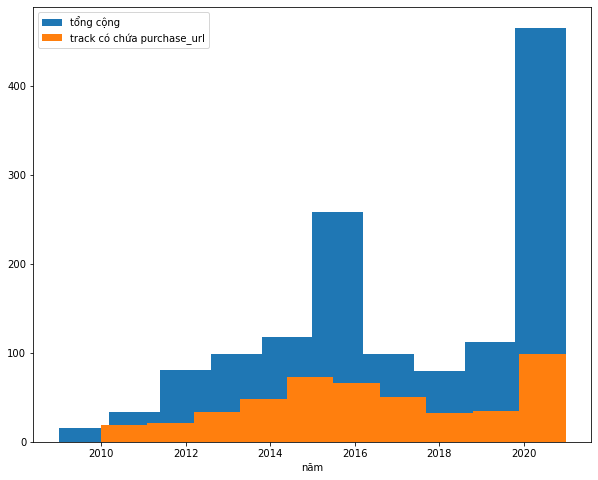

In [44]:
plt.figure(figsize=(10, 8))

plt.hist(tracks_per_year.year);

plt.hist(purchase_year.year)
plt.xlabel("năm")

plt.legend(["tổng cộng" ,"track có chứa purchase_url"]);

In [45]:
print("Tổng cộng", len(purchase_year.year), "mẫu")

Tổng cộng 476 mẫu


In [46]:
print("Tổng cộng có", len(purchase_year.year.unique()), "năm")

Tổng cộng có 12 năm


#### Dữ liệu đa biến:

- tiến hành lấy ra **số lượng track có đính kèm link mua** và **số lượng track tổng cộng** của **6 năm gần nhất**.

In [47]:
tracks_per_year = tracks_per_year.groupby("year").count()[-6:]

In [48]:
purchase_per_year = purchase_year.groupby("year").count()[-6:]

- sử dụng số lượng

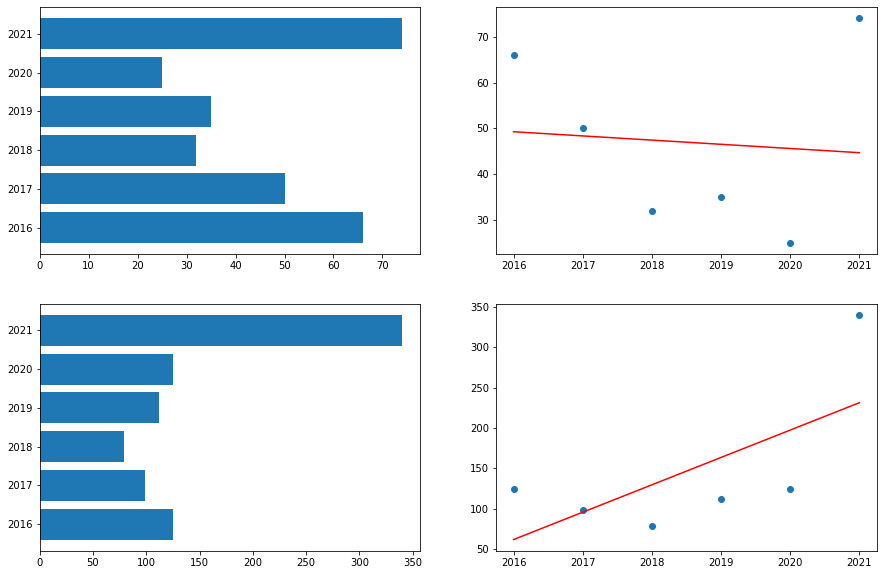

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

x, y = np.array(list(purchase_per_year.index)), np.array(list(purchase_per_year.values.flatten()))

axes[0, 0].barh(x, y)
axes[0, 1].scatter(x, y)

# get m (slope) and b (intercept).
m, b = np.polyfit(x, y, 1)

axes[0, 1].plot(x, m*x + b, color="red");

x, y = np.array(list(tracks_per_year.index)), np.array(list(tracks_per_year.values.flatten()))

axes[1, 0].barh(x, y)
axes[1, 1].scatter(x, y)

# get m (slope) and b (intercept).
m, b = np.polyfit(x, y, 1)

axes[1, 1].plot(x, m*x + b, color="red");

- sử dụng phần trăm so với tổng số lượng track

<Figure size 720x360 with 0 Axes>

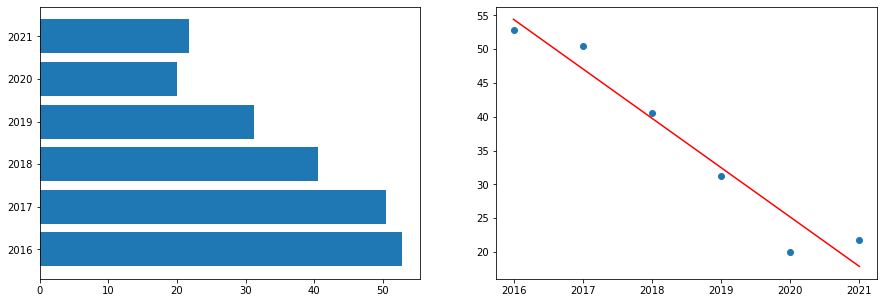

In [50]:
a, b = np.array(list(purchase_per_year.index)), np.array(list(purchase_per_year.values.flatten()))
t = np.array(list(tracks_per_year.values.flatten()))
b = (b/t)*100

# get m (slope) and it (intercept).
m, it = np.polyfit(a, b, 1)

plt.figure(figsize=(10, 5));

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].barh(a, b);
axes[1].scatter(a, b);
axes[1].plot(a, m*a + it, color="red");


## Đánh giá kết quả phân tích dữ liệu và đưa ra câu trả lời

**Qua các năm, nhìn chung thì biểu đồ cho chúng ta thấy số lượng track có chứa link mua giảm mạnh qua từng năm\
Nhưng số lượng track được đăng tải qua từng năm vẫn ổn định**
* Cho thấy nhu cầu thương mại của người dung đang **giảm** lên qua từng năm.
* Tại năm 2019 số lượng track có chứa link mua có dấu hiệu tăng trở lại, nhưng sau đó lại giảm.
* Nhưng đến năm 2021 có sự tăng lên của số lượng track được đăng tải và **số lượng track có chứa link mua cũng tăng**. Nhưng so với cách năm trước thì có thể coi là **số lượng track có chứa link mua** đang giảm.

---

**Tại sao lại có sự biến đổi trong dữ liệu?**\
<font color="green">**Sự tăng trưởng từ năm 2019 -> 2021:**</font>
- Từ năm 2019 đến 2021 thì có 1 sự kiện nổi bật là dịch bệnh covid-19 khiến cho mọi hoạt động kinh tế bị trì trệ, gây ảnh hưởng không nhỏ tới các nghệ sĩ vì phần lớn thu nhập của họ đến từ các buổi biểu diễn trước tiếp và các sản phẩm (đĩa CD, vinyl, merch,...), nhiều nghệ sĩ vẫn tổ chức buổi biểu diễn trực tiếp có trả phí và họ còn phát hành những MV Ca nhạc trên nền tảng Youtube, nên các nền tảng ẩm nhạc trức tuyến như SoundCloud chỉ được coi như là công cụ để giúp họ để giúp họ quảng bá các sản phẩm âm nhạc của họ đi xa hơn -> nên họ bắt đầu đăng tải các sản phẩm của mình lên đây nhiều hơn.
- Ngoài ra vào năm 2021, SoundCloud vừa đưa ra 1 chính sách mới đó là thay đổi hình thức tri trả cho các nghệ sĩ với mô hình thanh toán **"user-centric"**, theo cách này thì có thể giúp cho các nghệ sĩ **indie** hoặc các nghệ sĩ ít nổi tiếng kiếm tiền dễ dàng hơn nhờ vào việc người dùng nghe nhạc của họ.
- Lưu ý link này chỉ dẫn đến 1 trang thương mại khác để giúp người dùng có thể mua track, **chứ nó không phải của SoundCloud**, các link này có thể dẫn đến **Ituntes** chẳng hạn.

**Vậy SoundCloud có tiềm năng để trở thành nhà phân phối nhạc bản quyển được không?**\
<font color="green">-> **câu trả lời là không** vì các user chỉ đơn giản là đăng tải các track của mình lên với mục là để tận dụng SoundCloud giúp quảng bá các sản phẩm âm nhạc của mình tới nhiều người hơn. Bằng chứng là **số lượng track được đăng tải qua từng năm vẫn ổn định**, chỉ có **năm 2021** là **tăng đột biến** chỉ là do trong thời gian giãn cách xã hội người dùng có nhiều thời gian rãnh rỗi hơn nên họ đăng tải nhiều bài hát hơn. </font>

**Kết luận**\
Người dùng chỉ đơn giản là muốn quảng bá các sản phẩm âm nhạc của mình tới nhiều người dùng hơn **trong khoảng thời gian giãn cách xã hội do dịch covid-19**.

---

# Câu hỏi 2:

## Đưa ra câu hỏi có ý nghĩa cần trả lời

Soundcloud từ lâu là một kênh được sử dụng để nghe các sản phẩm dạng âm thanh có bản quyền một cách miễn phí cho tất cả mọi người, nhưng không vì thế mà các creator không thể kiếm giá trị thương mại cho các sản phẩm của mình.\
Soundcloud đã và đang hỗ trợ các creator thông qua việc cung cấp các gói subscription giúp người sáng tạo có thể thu về giá trị thương mại cũng như cho phép donation từ các fan của họ.


### Câu hỏi được đặt ra là:  Sự thay đổi về số lượng creator sử dụng gói pro/pro-unlimited/free trong 5 năm gần nhất (2016-2021) thông qua các creator có các sản phẩm được nghe nhiều nhất (tại thời điểm thu thập dữ liệu).

> Vì vậy khi trực quan được dữ liệu của được câu hỏi, ta sẽ phân tích được xu hướng hoạt động thương mại thông qua soundcloud của các creator qua các năm

---

## Mong đợi về tập dữ liệu

Mong muốn thấy số lượng người sáng tạo nội dung đăng kí các gói pro hay pro-unlimited của soundcloud ngày càng tăng qua các năm.(lí do) Để thấy được độ ưa chuộng nền tảng Soundcloud của các creator trong thời buổi xuất hiện ngày càng nhiều nền tảng giải trí, học tập qua âm thanh

---

## Trả lời các câu hỏi về bộ dữ liệu

#### Xác định bộ dữ liệu thu thập:
- Bộ dữ liệu được thu thập thông qua danh sách các bài hát thuộc top 50 cũng như các bài hát thuộc các playlist được nghe nhiều trong thời gian thu thập.
#### Xác định các cột dữ liệu cần phân tích
- created_at
- creator_subscriptions

#### Câu hỏi có được trả lời với bộ dữ liệu có sẵn?
- Với bộ dữ liệu thu được từ api của soundcloud thì có thể đảm bảo câu hỏi được trả lời đối với các tài khoản tạo trong thời gian gần.
- Tuy nhiên, trong dữ liệu không thể hiện thời gian mà user nâng cấp gói subscription nên việc đánh giá nhóm các tài khoản được tạo từ sớm sẽ không được chính xác.

---

## Danh sách kiểm tra phân tích dữ liệu:

### Tiền xử lí
- Lọc các dữ liệu lỗi / trống của các cột cần cho phân tích (đã xử lí ở trên)
- Điều chỉnh lại kiểu dữ liệu nếu chưa đúng (đã xử lí created_at)
- Phân nhóm theo năm ? (nếu cần thiết)

### Phân tích dữ liệu
- Trực quan hoá dữ liệu từng cột
- Trực quan tương quan giữa 2 cột

### Đọc dữ liệu
- Phân tích đánh giá trong qua trực quan

---

## Tiền xử lý

In [51]:
users['created_at'].head()

0   2011-10-31 10:24:30
1   2011-12-02 06:59:50
2   2011-03-29 06:34:41
3   2014-11-30 14:55:30
4   2012-08-12 01:43:05
Name: created_at, dtype: datetime64[ns]

In [52]:
users['creator_subscriptions'].head()

0    [{'product': {'id': 'creator-pro-unlimited'}}]
1              [{'product': {'id': 'creator-pro'}}]
2    [{'product': {'id': 'creator-pro-unlimited'}}]
3                     [{'product': {'id': 'free'}}]
4                     [{'product': {'id': 'free'}}]
Name: creator_subscriptions, dtype: object

##### Điều chỉnh lại kiểu dữ liệu của users['creator_subscriptions'] thành list các dict

In [53]:
subs = []
for sub in users['creator_subscriptions']:
    sub = '\"'.join(sub.split('\'')).strip('[]')
    subs.append(json.loads(sub))

Thử lại kiểu dữ liệu

In [54]:
type(subs[0])

dict

---

## Phân tích dữ liệu để trả lời cho câu hỏi

### Trực quan phân bố dữ liệu của ngày tạo user (theo năm)

In [55]:
year_created = [i.year for i in users['created_at']]

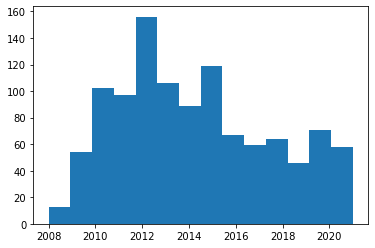

In [56]:
info_year = plt.hist(year_created,bins=14)

### Trực quan phân bố dữ liệu gói subscription của user

In [57]:
sub_types = [i['product']['id'] for i in subs]

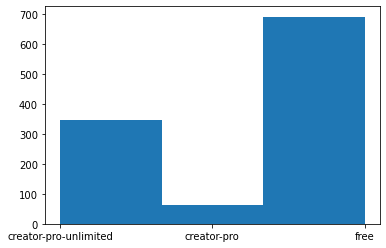

In [58]:
info_sub = plt.hist(sub_types,bins=3)

### Trực quan tương quan giữa created_at và creator_subscription

In [59]:
_df = pd.DataFrame([year_created,sub_types],index=['year','subs']).T.convert_dtypes()

In [60]:
list_year = sorted(_df['year'].unique())
list_sub = _df['subs'].unique()
data_count = {}
for i in list_year:
    data_count[i] = []
    for j in list_sub:
        count = _df.loc[(_df['year'] == i) & (_df['subs']== j)].count()[0]
        data_count[i].append(count)

## Thực hiện loại bỏ dữ liệu các năm trước 2016
for i in range(2008,2016): data_count.__delitem__(i)
data_count

{2016: [19, 5, 43],
 2017: [11, 2, 46],
 2018: [11, 0, 53],
 2019: [7, 2, 37],
 2020: [12, 0, 59],
 2021: [5, 0, 53]}

In [61]:
data_table = pd.DataFrame(data_count,index=list_sub).T

<AxesSubplot:>

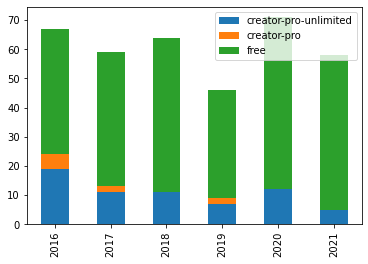

In [62]:
data_table.plot.bar(stacked=True)

## Đọc dữ liệu và đánh giá kết luận

Phân tích từ biểu đồ:
+ Giai đoạn từ năm 2016 đến hết năm2019, ta nhận thấy rằng creator của soundcloud có chiều hướng giảm về số lượng tạo mới cũng như về số lượng sử dụng gói pro-unlimited
+ Tuy nhiên trong năm 2020 thì số lượng creator lại tăng mạnh và xu hướng sử dụng gói pro-unlimited cũng tăng trở lại (nhưng chiếm tỉ lệ thấp)
+ Trong năm 2021 tính đến thời điểm được thu thập (cuối năm 2021) số liệu cho thấy số lượng nhà sáng tạo lại giảm sút và có lượng đăng kí gói cao nhất là thấp nhất

Đánh giá - kết luận: Có thể thấy xu hướng thương mại các sản phẩm qua soundcloud của các nhà sáng tạo liên tục giảm qua các năm.
Giải thích cho việc này, ta có thể xét vào các giai đoạn cụ thể là vào 3 năm gần nhất 2019, 2020 và 2021:
- Vào năm 2019, thế giới đón nhận một nền tảng âm nhạc toàn cầu mới và tạo thành xu hướng đó là Spotify. Điều này ảnh hưởng mạnh đến số lượng tạo mới các tài khoản creator.
- Trong khi đó, năm 2020 là thời điểm nóng của dịch bệnh covid trên toàn cầu và cũng là thời điểm xuất hiện những khái niệm mới 'giãn cách xã hội', 'làm việc từ xa' và việc số hoá được đẩy mạnh. Điều này đã giúp cho soundcloud cũng như các nền tảng âm nhạc online khác trở nên nhộn nhịp và đa dạng hơn. Tuy nhiên, từ sự ảnh hưởng của nền tảng Spotify mà tỉ lệ về số lượng creator mới muốn thương mại hoá các sản phẩm vẫn chiếm tỉ lệ thấp (hay có thể nói là rất thấp).
- Năm 2021, nhờ vào sự xuất hiện của vacine mà việc 'giãn cách xã hội' dần được nới lỏng ở nhiều quốc gia. Đồng nghĩa với việc các nhà sáng tạo 'có tiếng' có thể đầu tư vào các sản phẩm của họ nhiều hơn về mặt hình ảnh, làm cho các kênh âm nhạc chỉ thuần âm thanh như soundcloud lại trở nên kém hấp dẫn hơn cũng như không thể tránh việc họ phải tham gia các hoạt động kinh tế khác để duy trì cuộc sống sau giãn cách.


---

# Câu hỏi 3:

## Đưa ra câu hỏi có ý nghĩa cần trả lời

Soundcloud là 1 nền tảng nghe nhạc miễn phí. Là nơi mà mọi người có thể đăng nhạc từ nghiệp dư đến chuyên nghiệp. Với người nghiệp dư 

**Vậy liệu việc đặt tên track dài, ngắn sẽ ảnh hưởng đến số lượt nghe.**

---

## Mong đợi về tập dữ liệu

Mong muốn số lượng chữ đặt tên là khoảng 7 $\to$ 17 để chủ tác phẩm có thể đặt tên phù hợp sao cho dễ tiếp cận người dùng.

---

## Tiền xử lý

Ta sẽ tìm hiểu xem số lượng từ trong tên track có ảnh hưởng đến lượt nghe không ?

**Ta sẽ tách đếm số lượng từ trong tracks**

Thay tất cả giá trị None trong 'playback_count' thành 0.

In [63]:
tracks['playback_count'].replace('None', 0, inplace=True)

In [64]:
Track_List = tracks['title'].tolist()
Num_Charac = [] #Tính số lượng từ có thể có ở bài hát trong tracks
for i in Track_List:
    temp = i.split(" ")
    Num_Charac.append(len(temp))
print('Số từ trong bài:' + str(set(Num_Charac)))
Time_Charac = [] #Tính số bài hát có số lượng từ từ nhỏ đến lớn trong Num_Charac
for i in set(Num_Charac):
    Time_Charac.append(Num_Charac.count(i))
print('Số lần xuất hiện số từ trong bài:' + str(Time_Charac))

Số từ trong bài:{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
Số lần xuất hiện số từ trong bài:[55, 41, 55, 80, 102, 104, 134, 112, 113, 112, 99, 77, 57, 50, 38, 31, 18, 28, 19, 15, 12, 6, 1, 1]


Ta có thể thấy được rằng từ 19 từ trở lên. Số lượng bài hát rất ít so với phần còn lại.

**Vậy nên ta sẽ tính trung bình lượt nghe của từng loại bài để so sánh**

In [65]:
#Trung binh
Mean_Play_Count = []
Each_Play_Charac = []
for i in set(Num_Charac):
    Play_Count = 0
    for j in Track_List:
        temp = j.split(" ")
        if(len(temp) == i):
            Play_Count += float((tracks.loc[tracks['title'] == j, 'playback_count']).iloc[0])
            Each_Play_Charac.append(float((tracks.loc[tracks['title'] == j, 'playback_count']).iloc[0]))
    Mean_Play_Count.append(Play_Count/Num_Charac.count(i))

Num_Charac_df = pd.DataFrame(Mean_Play_Count,index=set(Num_Charac),columns=['Mean_play'])

In [66]:
X_Scatter = []
for i in range(len(Time_Charac)):
    for j in range(Time_Charac[i]):
        X_Scatter.append(i+1)

---

## Phân tích dữ liệu để trả lời cho câu hỏi

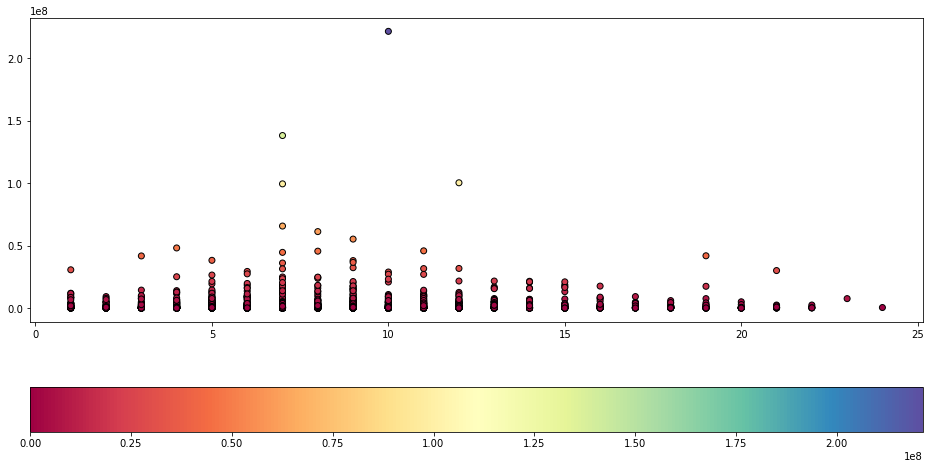

In [67]:
plt.figure(figsize=(16,8))
plt.scatter(X_Scatter,Each_Play_Charac,c=Each_Play_Charac,cmap='Spectral',edgecolors='k')
plt.colorbar(orientation='horizontal')

Ta thấy giá trị ở các cột từ 16 trở về sau lại xuất hiện quá ít giá trị. Ta sẽ xét các cột còn lại.

<BarContainer object of 24 artists>

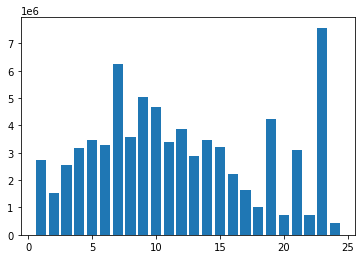

In [68]:
plt.bar(Num_Charac_df.index,Num_Charac_df['Mean_play'])

Ở cột thứ 7 và 10 có 2 giá trị xuất hiện có vẻ như là outlier, nên ta sẽ kiểm tra xem liệu số lượt nghe 2 giá trị này có phải là thật không.

In [69]:
Track_7 = []
Track_10 = []
Play_Track_10 = []
check, Max7, Max10 = 0, 0, 0
for i in Track_List:
    temp = i.split(" ")
    if(len(temp) == 7):
        Track_7.append(i)
        Track_7.append(float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0]))
        if check == 0:
            Max7 = float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0])
        else:
            if(float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0]) > Max7):
                Max7 = float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0])
    if(len(temp) == 10):
        Track_10.append(i)
        Track_10.append(float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0]))
        if check == 0:
            Max10 = float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0])
        else:
            if(float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0]) > Max10):
                Max10 = float((tracks.loc[tracks['title'] == i, 'playback_count']).iloc[0])

In [70]:
Max7_index = Track_7.index(Max7) - 1
print(Track_7[Max7_index])

Max10_index = Track_10.index(Max10) - 1
print(Track_10[Max10_index])

Azealia Banks - 212 (ft. Lazy Jay)
Sander van Doorn & Julian Jordan - Kangaroo (Original Mix)


Đây là 2 bài hát có số lượt nghe cao trên nền tảng utube nên lượt nghe này là số liệu thật.

Vậy qua các số liệu trên ta có thể kết luận rằng: Đặt tên track trong khoảng từ 7-12 từ sẽ tăng lượt nghe hơn.

# Câu 4

## Đưa ra câu hỏi có ý nghĩa cần trả lời

Tỉ lệ % track cho phép tải theo năm.

Trả lời: Các năm gần đây, ý thức về bản quyền điện tử của mọi người ngày càng cao, liệu điều này có ảnh hưởng đến việc cho phép tải track hay không?

---

## Mong đợi về tập dữ liệu

Mong muốn dữ liệu có thể đưa ra tỉ lệ % cho phép tải qua các năm có sự giảm rõ rệt vì điều này sẽ giúp chứng minh được việc mọi người quan tâm đến bản quyền điện tử ngày càng nhiều hơn.

---

### Trả lời các câu hỏi về bộ dữ liệu


#### Xác định các cột dữ liệu cần phân tích
- created_at của tracks
- downloadable của tracks

#### Câu hỏi có được trả lời với bộ dữ liệu có sẵn?
- Với bộ dữ liệu thu được từ api của soundcloud thì có thể đảm bảo câu hỏi được trả lời đối với các track mà user không thay đổi việc cho phép tải hay không.

---

## Phân tích dữ liệu để trả lời cho câu hỏi

### Trực quan phân bố dữ liệu các track được tạo theo năm

In [71]:
year_created = [i.year for i in tracks['created_at']]
year_created_unique = []
for i in year_created:
    if i not in year_created_unique:
        year_created_unique.append(i)
year_created_unique.sort()
year_created_unique

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [72]:
count_year = len(year_created_unique)
print('Tổng cộng', count_year, 'năm')

Tổng cộng 13 năm


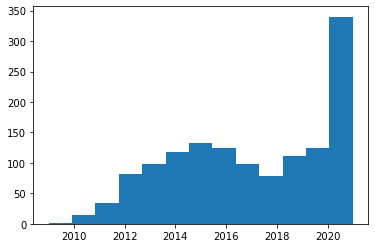

In [73]:
info_year = plt.hist(year_created,bins=count_year)

### Trực quan phân bố dữ liệu của việc cho phép tải track

In [74]:
downloadable_list = tracks['downloadable']
count_downloadable = downloadable_list.value_counts()
count_downloadable 

False    1171
True      189
Name: downloadable, dtype: int64

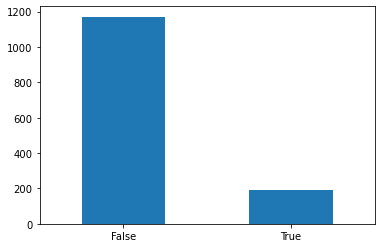

In [75]:
info_downloadable = count_downloadable.plot.bar(rot = 0)

### Trực quan tỉ lệ % track cho phép tải theo năm

In [76]:
df = pd.DataFrame([year_created, downloadable_list], index=['year','downloadable']).T

In [77]:
df.head()

,year,downloadable
0,2018,False
1,2018,True
2,2018,False
3,2021,False
4,2020,False


In [78]:
dict_down_by_year = {}
for year in year_created_unique:
    df_2 = df.loc[df['year'] == year]
    count_bool = df_2.shape[0]
    count_True = df_2.loc[df_2['downloadable'] == True].shape[0]
    percentile = count_True / count_bool * 100
    dict_down_by_year[year] = percentile    

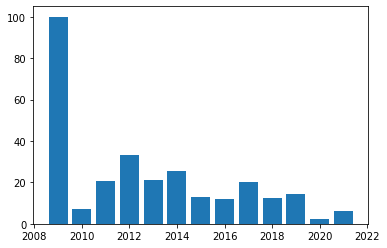

In [79]:
plt.bar(*zip(*dict_down_by_year.items()))
plt.show()

### Phân tích và đánh giá

Phân tích:

- Giai đoạn 2009 - 2019, tỉ lệ cho phép tải track giao động nhưng vẫn khá cao

- Năm 2020 số lượng track lớn hơn năm 2019 nhưng số lượng track cho phép tải lại giảm rất nhiều, dẫn đến tỉ lệ cho phép tải giảm mạnh.

- Đến năm 2021, số lượng track nhiều hơn gấp đôi năm 2020 nhưng tỉ lệ cho phép tải không tăng nhiều, cũng chỉ khoảng hơn 5%.

Đánh giá:
- Như vậy, ý thức bản quyền điện tử có ảnh hưởng tới việc cho phép tải track, đặc biệt là trong 2 năm 2020 và 2021.

# Câu 5:

## Đưa ra câu hỏi có ý nghĩa cần trả lời

Xét tỷ lệ tương quan giữa followers và số track của user, liệu rằng có nhất thiết phải có nhiều tracks thì mới có thể nâng sự phổ biến của mình lên hay không, hay còn yếu tố nào khác ảnh hưởng? Có thể đo độ phổ biến thông qua followers, comment, và số lượng like….
Trả lời được câu hỏi này thì ta sẽ biết được rằng khi bắt đầu sáng tác thì ta nên sáng tác đều đặn, ra nhiều bài càng tốt hay là nên đi theo hướng “chậm mà chắc” ….vân vân


---

## Mong đợi về tập dữ liệu

Mong đợi số lượt tương tác (like, comment, repost,...) cũng như lượng follower càng cao sẽ làm cho lượt nghe càng cao, lí do là để hiểu dược tại sao các nhạc sĩ, producer ngày nay thường hay có các chiến dịch quảng cáo, tích cực hoạt động trên các nền tảng xã hội để thu hút followers cho mình và các sản phẩm âm nhạc.

---

## Tiền xử lý

In [80]:
new_df = tracks.merge(users[['followers_count','id']], how = 'left', left_on='user_id', right_on='id')
new_df.drop(['id_y'], axis = 1, inplace = True)
new_df.rename(columns={'id_x':'id'}, inplace = True)

In [81]:
#thêm vào 1 cột day_till_now thể hiện số ngày track đã tồn tại cho đến hiện tại
days_int = []
for value in new_df['created_at']:
    days_int.append(int(value.strftime('%Y%m%d')))
now = datetime.now()
now = int(now.strftime('%Y%m%d'))
for i in range(0,len(days_int)):
    days_int[i] = now - days_int[i] 
new_df['day_till_now'] = days_int

In [82]:
#bỏ đi những dòng comment_count là None
new_df.drop(new_df.loc[new_df['comment_count']== 'None'].index, inplace=True)

In [83]:
new_df['playback_count'] = pd.to_numeric(new_df['playback_count'])
new_df['comment_count'] = pd.to_numeric(new_df['comment_count'])
new_df['likes_count'] = pd.to_numeric(new_df['likes_count'])

In [84]:
tracks.columns

Index(['commentable', 'comment_count', 'created_at', 'downloadable',
       'download_count', 'duration', 'genre', 'id', 'kind', 'label_name',
       'likes_count', 'playback_count', 'public', 'purchase_url',
       'reposts_count', 'sharing', 'state', 'streamable', 'title', 'user_id',
       'year'],
      dtype='object')

---

## Phân tích dữ liệu để trả lời cho câu hỏi

In [85]:
list_col = ['likes_count','reposts_count','comment_count', 'day_till_now','followers_count','duration']

In [86]:
corr_value = new_df.corr(method='spearman')['playback_count']

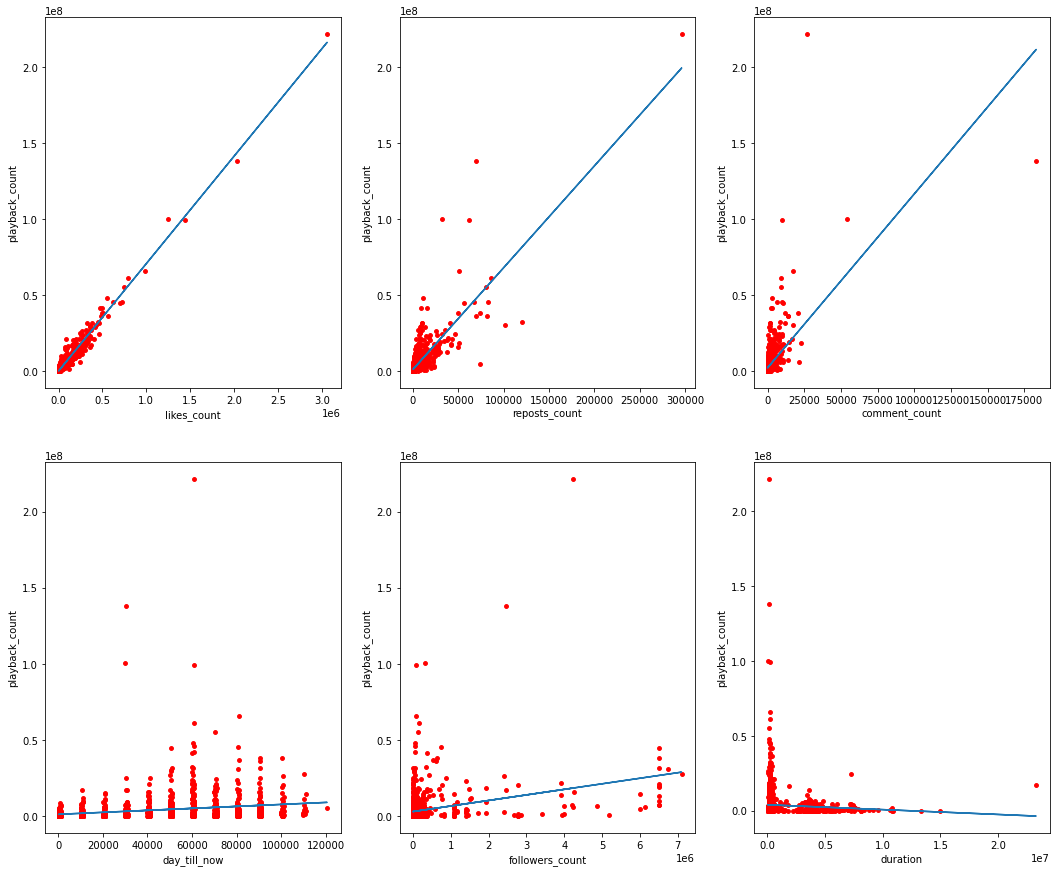

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 15))
i = 0
j = 0
for value in list_col:
    if value == 'day_till_now':
        i = 1
        j = 0
    m, b = np.polyfit(new_df[value], new_df['playback_count'],1)
    #plt.figure(figsize=(5,5))
    ax[i,j].scatter(new_df[value], new_df['playback_count'], s = 15, c = 'red')
    ax[i,j].set(xlabel = value, ylabel = 'playback_count')
    ax[i,j].plot(new_df[value], m*new_df[value] + b)
    j += 1

In [88]:
print('Xếp hạng mức độ ảnh hưởng của từng thuộc tính đã chọn đối với playback_count(số lần nghe):')
for value in list_col:
    print( value + ': ' + str(round(corr_value[value], 2)))

Xếp hạng mức độ ảnh hưởng của từng thuộc tính đã chọn đối với playback_count(số lần nghe):
likes_count: 0.96
reposts_count: 0.89
comment_count: 0.86
day_till_now: 0.49
followers_count: 0.45
duration: -0.03


## Nhận xét về kết quả  của câu hỏi

1) Số lượt like có vẻ là tương quan nhiều nhất đối với số lượt nghe của 1 bài hát, có thể thấy các giá trị bám khá sát đường hồi quy trong hình => số lượt like 1 bài hát càng cao thì khả năng nó được nghe nhiều lần cao hơn

2) Xếp sau lần lượt là số lượt repost và số comment của bài hát với mức tương quan khá cao, và thể hiện trong hình vẽ thì các điểm giá trị cũng phản ánh theo như đường hồi quy => số repost và số comment tương tác cũng khá quan trọng

3) Sang đến phần day_till_now, tức số ngày mà track đã tồn tại trên nền tảng soundcloud, thì có vẻ kết quả không được khả quan cho lắm, các giá trị thực phân bố khá xa so với đường hồi quy. Nhưng chủ yếu ta thấy phần giữa của dữ liệu là tập trung phần nhiều giá trị. Có thể thấy rằng các bài hát đã tồn tại ở một mốc thời gian ở phần giữa của tập day_till_now thì thường có số lượt nghe cao hơn là các giá trị còn lại => Các bài ra quá lâu thì không còn độ hot nên số lượt nghe không tăng cao, các bài mới ra gần đây thì do thời gian tồn tại còn ít nên số lượt nghe chưa bằng. Nên các bài tồn tại được khoảng thời gian giữa của tập này thì thường sẽ có số lượt nghe cao hơn, do độ hot chưa giảm nhiều và thời gian tồn tại cũng đủ lâu

4) Phần số lượng người follower của nghệ si có vẻ như không quá ảnh hưởng đến số lượt nghe của 1 bài hát, hoặc có thể tập số bài hát trong dữ liệu gốc chưa đủ để phán ánh, nhưng về căn bản thì có khả năng là follower càng nhiều thì số lượt nghe bài hát của người upload bài hát đó có thể tăng(dựa vào đường hồi quy), chỉ là có thể cần thêm nhiều bài hát hơn để xác định rõ hơn phần này.

5) Phần duration thì ra có thể thấy rằng là nếu bài hát mà càng dài thì khả năng là số lượt nghe bài hát đó càng ít. Có khả năng là bài dài quá thì người nghe thường không thích do tốn thời gian, hoặc có thể phần mà người nghe muốn nghe trong bài hát đó ít hơn so với độ dài của bài hát nên dẫn đến họ chuyển bài trước khi toàn bộ bài hát kết thúc chăng? Dẫn đến soundcloud không tính số lượt nghe cho lần nghe đó?

Tóm lại thì dựa vào kết quả phân tích ở trên thì có thể thấy mức độ ảnh hưởng của việc like, share, comment rất quan trọng trong việc một bài hát có số lượt nghe cao hay thấp. Và có khả năng là các nghệ sĩ, người uplaod có followers cao thì cũng có thể số lượt nghe bài hát của họ cũng sẽ cao hơn bình. Từ đây ta có thể thấy được rằng của việc like,share,comment đối với 1 sản phẩm âm nhạc nói chung và 1 sản phẩm bất kỳ nói riêng là rất quan trọng, và nó có liên quan đến cả việc mức độ quảng bá hình ảnh của một nhạc sĩ, ca sĩ, hay bất cứ người tạo ra sản phẩm nào trong thực tế.